## **Vegetable Image Dataset**

- 채소의 종류 다중분류 (15종)  
https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset

In [1]:
from glob import glob
import os

# 경로 지정
train_dir = './datasets/vegetable/vegetable/train/'
validation_dir = './datasets/vegetable/vegetable/validation/'
test_dir = './datasets/vegetable/vegetable/test/'

# 해당 경로를 통해 이미지 폴더를 찾아옴
directories = glob(os.path.join(train_dir, '*'))

In [2]:
# 폴더 이름 저장할 초기 list 생성
directory_names = []

for directory in directories:
    # 디렉토리의 이름을 찾아와서 list에 저장
    directory_names.append(directory[directory.rindex('\\') + 1:])

print(directory_names)

['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


In [3]:
# # 이미지 별 폴더 안 이미지들의 파일명 변경
# for name in directory_names:
#     for i, file_name in enumerate(os.listdir(os.path.join(train_dir, name))):
#         # 이전 파일의 전체 경로
#         old_file = os.path.join(train_dir + name + '/', file_name)
#         # 신규 파일 전체 경로 작성
#         new_file = os.path.join(train_dir + name + '/', name + str(i + 1) + '.png')

#         # 이전 파일의 이름을 신규 파일로 변경
#         os.rename(old_file, new_file)

# for name in directory_names:
#     for i, file_name in enumerate(os.listdir(os.path.join(validation_dir, name))):
#         # 이전 파일의 전체 경로
#         old_file = os.path.join(validation_dir + name + '/', file_name)
#         # 신규 파일 전체 경로 작성
#         new_file = os.path.join(validation_dir + name + '/', name + str(i + 1) + '.png')

#         # 이전 파일의 이름을 신규 파일로 변경
#         os.rename(old_file, new_file)

# for name in directory_names:
#     for i, file_name in enumerate(os.listdir(os.path.join(test_dir, name))):
#         # 이전 파일의 전체 경로
#         old_file = os.path.join(test_dir + name + '/', file_name)
#         # 신규 파일 전체 경로 작성
#         new_file = os.path.join(test_dir + name + '/', name + str(i + 1) + '.png')

#         # 이전 파일의 이름을 신규 파일로 변경
#         os.rename(old_file, new_file)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 244

# 이미지 전처리 객체 선언
idg = ImageDataGenerator()

# 경로를 통해 이미지 불러온 후 이미지 전처리 진행
train_generator = idg.flow_from_directory(train_dir,
                                          target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                          batch_size=BATCH_SIZE,
                                          class_mode='categorical',
                                          shuffle=True)

# 경로를 통해 이미지 불러온 후 이미지 전처리 진행
validation_generator = idg.flow_from_directory(validation_dir,
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical')

# 경로를 통해 이미지 불러온 후 이미지 전처리 진행
test_generator = idg.flow_from_directory(test_dir,
                                         target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                         batch_size=BATCH_SIZE,
                                         class_mode='categorical')

# 각 클랙스의 이름과 인덱스 출력
print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
{'Bean': 0, 'Bitter_Gourd': 1, 'Bottle_Gourd': 2, 'Brinjal': 3, 'Broccoli': 4, 'Cabbage': 5, 'Capsicum': 6, 'Carrot': 7, 'Cauliflower': 8, 'Cucumber': 9, 'Papaya': 10, 'Potato': 11, 'Pumpkin': 12, 'Radish': 13, 'Tomato': 14}
{'Bean': 0, 'Bitter_Gourd': 1, 'Bottle_Gourd': 2, 'Brinjal': 3, 'Broccoli': 4, 'Cabbage': 5, 'Capsicum': 6, 'Carrot': 7, 'Cauliflower': 8, 'Cucumber': 9, 'Papaya': 10, 'Potato': 11, 'Pumpkin': 12, 'Radish': 13, 'Tomato': 14}
{'Bean': 0, 'Bitter_Gourd': 1, 'Bottle_Gourd': 2, 'Brinjal': 3, 'Broccoli': 4, 'Cabbage': 5, 'Capsicum': 6, 'Carrot': 7, 'Cauliflower': 8, 'Cucumber': 9, 'Papaya': 10, 'Potato': 11, 'Pumpkin': 12, 'Radish': 13, 'Tomato': 14}


In [4]:
# 각 타겟의 타겟 이름을 담기 위해 key와 value의 순서 변경하여 타겟의 고유값을 저장
target_name = {v: k for k, v in train_generator.class_indices.items()}
target_name

{0: 'Bean',
 1: 'Bitter_Gourd',
 2: 'Bottle_Gourd',
 3: 'Brinjal',
 4: 'Broccoli',
 5: 'Cabbage',
 6: 'Capsicum',
 7: 'Carrot',
 8: 'Cauliflower',
 9: 'Cucumber',
 10: 'Papaya',
 11: 'Potato',
 12: 'Pumpkin',
 13: 'Radish',
 14: 'Tomato'}

In [5]:
# 각 타겟의 이름 담을 초기 list 선언
tarin_target_names = []
validation_target_names = []
test_target_names = []

# 각 타겟의 인덱스를 확인하여 인덱스에 맞는 타겟 이름을 담아주기
for target in train_generator.classes:
    tarin_target_names.append(target_name[target])

for target in validation_generator.classes:
    validation_target_names.append(target_name[target])

for target in test_generator.classes:
    test_target_names.append(target_name[target])

# 각 타겟의 개수 확인
print(tarin_target_names.__len__(), validation_target_names.__len__(), test_target_names.__len__())

15000 3000 3000


In [6]:
import pandas as pd

# 파일 경로와 타겟값을 가지고 새로운 데이터 프레임 생성 후
# 경로 중 \\(역슬래시)로 되어 있는 부분을 /(슬래시)로 변경
train_df = pd.DataFrame({'file_paths': train_generator.filepaths, 'target_names': tarin_target_names, 'targets': train_generator.classes})
train_df.file_paths = train_df.file_paths.apply(lambda x: x.replace('\\', '/'))

validation_df = pd.DataFrame({'file_paths': validation_generator.filepaths, 'target_names': validation_target_names, 'targets': validation_generator.classes})
validation_df.file_paths = validation_df.file_paths.apply(lambda x: x.replace('\\', '/'))

test_df = pd.DataFrame({'file_paths': test_generator.filepaths, 'target_names': test_target_names, 'targets': test_generator.classes})
test_df.file_paths = test_df.file_paths.apply(lambda x: x.replace('\\', '/'))

display(train_df)
display(validation_df)
display(test_df)

file_paths target_names  targets
0      ./datasets/vegetable/vegetable/train/Bean/0026...         Bean        0
1      ./datasets/vegetable/vegetable/train/Bean/0028...         Bean        0
2      ./datasets/vegetable/vegetable/train/Bean/0029...         Bean        0
3      ./datasets/vegetable/vegetable/train/Bean/0030...         Bean        0
4      ./datasets/vegetable/vegetable/train/Bean/0034...         Bean        0
...                                                  ...          ...      ...
14995  ./datasets/vegetable/vegetable/train/Tomato/09...       Tomato       14
14996  ./datasets/vegetable/vegetable/train/Tomato/09...       Tomato       14
14997  ./datasets/vegetable/vegetable/train/Tomato/09...       Tomato       14
14998  ./datasets/vegetable/vegetable/train/Tomato/09...       Tomato       14
14999  ./datasets/vegetable/vegetable/train/Tomato/10...       Tomato       14

[15000 rows x 3 columns]

file_paths target_names  targets
0     ./datasets/vegetable/vegetable/validation/Bean...         Bean        0
1     ./datasets/vegetable/vegetable/validation/Bean...         Bean        0
2     ./datasets/vegetable/vegetable/validation/Bean...         Bean        0
3     ./datasets/vegetable/vegetable/validation/Bean...         Bean        0
4     ./datasets/vegetable/vegetable/validation/Bean...         Bean        0
...                                                 ...          ...      ...
2995  ./datasets/vegetable/vegetable/validation/Toma...       Tomato       14
2996  ./datasets/vegetable/vegetable/validation/Toma...       Tomato       14
2997  ./datasets/vegetable/vegetable/validation/Toma...       Tomato       14
2998  ./datasets/vegetable/vegetable/validation/Toma...       Tomato       14
2999  ./datasets/vegetable/vegetable/validation/Toma...       Tomato       14

[3000 rows x 3 columns]

file_paths target_names  targets
0     ./datasets/vegetable/vegetable/test/Bean/0001.jpg         Bean        0
1     ./datasets/vegetable/vegetable/test/Bean/0002.jpg         Bean        0
2     ./datasets/vegetable/vegetable/test/Bean/0003.jpg         Bean        0
3     ./datasets/vegetable/vegetable/test/Bean/0004.jpg         Bean        0
4     ./datasets/vegetable/vegetable/test/Bean/0005.jpg         Bean        0
...                                                 ...          ...      ...
2995  ./datasets/vegetable/vegetable/test/Tomato/119...       Tomato       14
2996  ./datasets/vegetable/vegetable/test/Tomato/119...       Tomato       14
2997  ./datasets/vegetable/vegetable/test/Tomato/119...       Tomato       14
2998  ./datasets/vegetable/vegetable/test/Tomato/119...       Tomato       14
2999  ./datasets/vegetable/vegetable/test/Tomato/120...       Tomato       14

[3000 rows x 3 columns]

In [8]:
print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(15000, 3)
(3000, 3)
(3000, 3)


## **사전훈련모델별 유사도 예측**

In [7]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 데이터 세트 생성 class 정의
class Dataset(Sequence):
    # 클래스의 초기화
    # 경로, 타겟, 배치 크기, albumentations 객체, 전처리 하마, 셔플 여부를 인자로 받음
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        # shuffle True 시 진행:
        if self.shuffle:
            # epoch 끝날 때마다 호출
            self.on_epoch_end()

    # 전체 데이터 세트 크기 반환
    def __len__(self):
        # 하나의 배치 사이즈에 필요한 데이터 개수 리턴
        return int(np.ceil(len(self.targets) / self.batch_size))

    # 주어진 인덱스에 해당하는 배치 반환
    def __getitem__(self, index):
        # 파일 경로와 타겟 데이터를 배치 크기만큼 자르고, 이미지를 불러와 처리한 후 배치로 반환
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # 데이터 배치 저장
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 데이터 수만큼 반복
        for i in range(file_paths_batch.shape[0]):
            # RGB로 색상 형식을 변환하여 이미지 가져오기
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 이미지 크기 조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # albumentations이 있다면:
            if self.aug is not None:
                # Augmentor 객체로 이미지 변환
                image = self.aug(image=image)['image']

            # 전처리 함수가 있다면:
            if self.preprocess is not None:
                # 이미지 전처리 진행
                image = self.preprocess(image)

            # 결과 배치에 이미지를 저장
            results_batch[i] = image

        # 결과 배치와 타겟 배치를 반환
        return results_batch, targets_batch
        
    def on_epoch_end(self):
        # shuffle 옵션이 켜져있다면, 데이터를 섞기
        if self.shuffle:
            # epoch 끝날 때마다 데이터 섞기
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)

In [8]:
def create_dataset(paths, targets, BATCH_SIZE, shuffle=True):   
    return Dataset(paths,
                   targets,
                   batch_size=BATCH_SIZE,
                   shuffle=True)

In [11]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

In [12]:
import matplotlib.pyplot as plt

def show_images(files_batch, ncols=4, title=None):    
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    
    for i in range(ncols):
        # files_batch는 float이므로 int로 변경
        axs[i].imshow(np.array(files_batch[i], dtype='int32'))
        axs[i].axis('off')
        axs[i].set_title(title[i]) 

In [13]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions as vgg16_decode_predictions
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions as resnet50v2_decode_predictions
from tensorflow.keras.applications.xception import Xception, decode_predictions as xception_decode_predictions
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, decode_predictions as mobilenetv2_decode_predictions

def predict_and_display(images, titles, model_name):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=len(images))

    # VGG16 모델 선택
    if model_name == 'vgg16':
        model = VGG16()
        decode_predictions = vgg16_decode_predictions
        target_size = (224, 224)
    # ResNet50V2 모델 선택
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2()
        decode_predictions = resnet50v2_decode_predictions
        target_size = (224, 224)
    # Xception 모델 선택
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception()
        decode_predictions = xception_decode_predictions
        target_size = (299, 299)
    # MobileNetV2 모델 선택
    elif model_name == 'mobilenet':
        model = MobileNetV2()
        decode_predictions = mobilenetv2_decode_predictions
        target_size = (224, 224)

    for i, image in enumerate(images):
        # 모델 입력 크기에 맞게 이미지 크기 조정
        resized_image = cv2.resize(image, target_size)
        # 이미지 배열로 변환
        image_array = img_to_array(resized_image)
        # 차원 확장 (배열의 첫 번째 차원 확장)
        image_array = np.expand_dims(image_array, axis=0)
        # 이미지 예측
        prediction = model.predict(image_array)
        # 이미지 분류 모델의 예측 결과를 해석
        target = decode_predictions(prediction)
        # 높은 확률로 예측 된 클래스 이름과 확률
        predicted_class = target[0][0][1]
        predicted_probability = np.round(target[0][0][2] * 100, 2)
        
        # 이미지와 예측 결과 표시
        axs[i].imshow(image.astype('int'))
        axs[i].axis('off')
        axs[i].set_title(f"{predicted_class}\n{predicted_probability}%")

        print(target)

In [14]:
import albumentations as A

# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 244

# 각 클래스에서 하나씩 이미지를 샘플링하여 균등한 배치 구성
sampled_df = test_df.groupby('targets', group_keys=False).apply(lambda x: x.sample(1))

# 데이터 경로 및 타겟 담기 (get_dummies를 통해 원-핫 인코딩 진행)
sampled_file_paths = sampled_df['file_paths'].values
sampled_targets = pd.get_dummies(sampled_df['targets']).values # CategoricalCrossEntropy

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.5),
    # 좌우 반전
    A.HorizontalFlip(p=0.5),
    # 밝기 및 대비 변경
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)

C:\Users\user\AppData\Local\Temp\ipykernel_1216\1732152726.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = test_df.groupby('targets', group_keys=False).apply(lambda x: x.sample(1))


In [15]:
# datasets 객체에서 배치 이미지를 불러온 후 각 변수에 저장
# iter: 반복 가능한 객체를 이터레이터(값을 순차적으로 반환하는 객체)로 변환
# next: 이터레이터 객체에서 값을 하나씩 가져오고 가져올 값이 없다면 StopIteration 예외 발생 
files_batch, targets_batch = next(iter(dataset))
# 레이블 인코딩시, target 차원을 2차원으로 맞춰줘야 한다.
print(files_batch.shape, targets_batch.shape)

(15, 244, 244, 3) (15, 15)


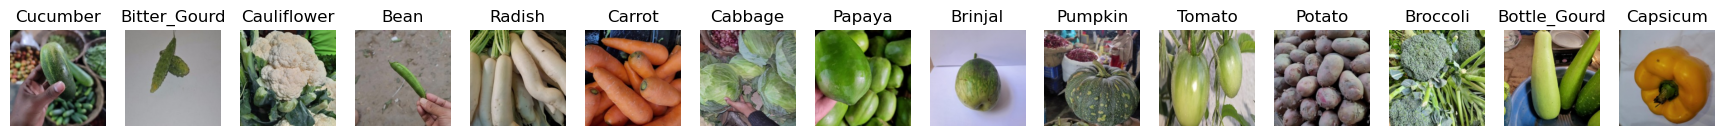

In [16]:
# # 타겟 비중
# print(test_df.groupby(by=['target_names', 'targets']).count())

# 이미지 제목 생성
titles = [target_name[np.argmax(target)] for target in targets_batch]

# 정답 출력
show_images(files_batch, ncols=15, title=titles)

vgg16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
[[('n07720875', 'bell_pepper', 0.32011), ('n03825788', 'nipple', 0.18035369), ('n02948072', 'candle', 0.063211486), ('n04131690', 'saltshaker', 0.05598065), ('n03476684', 'hair_slide', 0.042745728)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
[[('n12985857', 'coral_fungus', 0.26296848), ('n01914609', 'sea_anemone', 0.08914675), ('n13052670', 'hen-of-the-woods', 0.08666923), ('n07734744', 'mushroom', 0.054872733), ('n04040759', 'radiator', 0.02888065)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
[[('n07720875', 'bell_pepper', 0.9504207), ('n02666196', 'abacus', 0.022255866), ('n07718472', 'cucumber', 0.012564673), ('n03065424', 'coil', 0.0047006), ('n07753113', 'fig', 0.001993596)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
[[('n01729977', 'green_snake', 0.11313516), ('n02236044', 'mantis', 0.10462622), ('n01945685', 'slug', 0.06860313), ('n03876231', 'paintbrush', 0.049704418), ('n01739381', 'vine_snake', 0.042923085)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220m

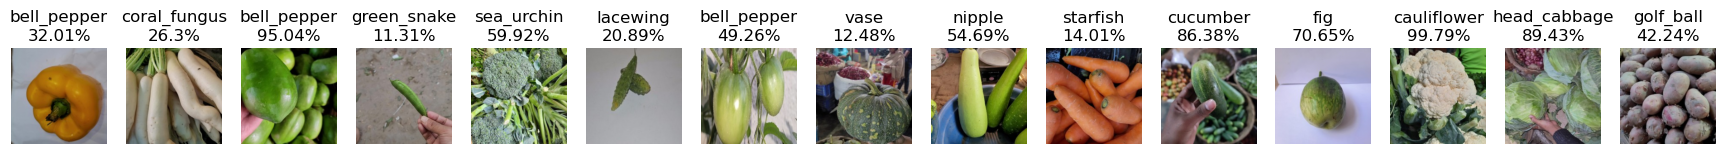

In [17]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

# 예측 모델 출력
print('vgg16')
predict_and_display(files_batch, titles, 'vgg16')

resnet50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[('n07613480', 'trifle', 1.0), ('n02089973', 'English_foxhound', 1.0303218e-26), ('n15075141', 'toilet_tissue', 0.0), ('n02317335', 'starfish', 0.0), ('n02389026', 'sorrel', 0.0)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[[('n02123597', 'Siamese_cat', 1.0), ('n02999410', 'chain', 3.50115e-12), ('n01688243', 'frilled_lizard', 1.04436445e-13), ('n02089973', 'English_foxhound', 2.8630052e-16), ('n03706229', 'magnetic_compass', 4.3148615e-18)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[('n07613480', 'trifle', 0.9272591), ('n02105056', 'groenendael', 0.05604426), ('n02089973', 'English_foxhound', 0.011984332), ('n01688243', 'frilled_lizard', 0.0047123637), ('n02356798', 'fox_squirrel', 3.15271e-09)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[[('n07613480', 'trifle', 1.0), ('n02089973', 'English_foxhound', 2.0149691e-22), ('n15075141', 'toilet_tissue', 0.0), ('n02317335', 'starfish', 0.0), ('n02389026', 'sorrel', 0.0)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/

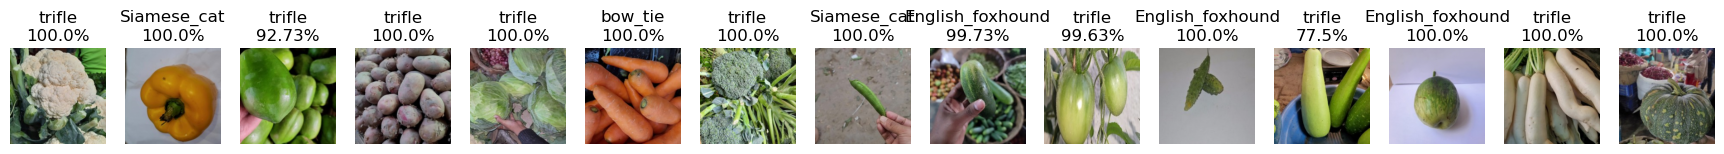

In [18]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('resnet50')
predict_and_display(files_batch, titles, 'resnet50')

xception
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n04127249', 'safety_pin', 0.99999976), ('n03775546', 'mixing_bowl', 1.8489473e-07), ('n03942813', 'ping-pong_ball', 9.390706e-20), ('n15075141', 'toilet_tissue', 0.0), ('n02391049', 'zebra', 0.0)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
[[('n03775546', 'mixing_bowl', 1.0), ('n04357314', 'sunscreen', 1.7799251e-10), ('n03942813', 'ping-pong_ball', 3.5458012e-19), ('n02105056', 'groenendael', 3.5304272e-20), ('n02106662', 'German_shepherd', 3.256436e-23)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
[[('n04127249', 'safety_pin', 1.0), ('n03775546', 'mixing_bowl', 1.01024686e-19), ('n15075141', 'toilet_tissue', 0.0), ('n02395406', 'hog', 0.0), ('n02389026', 'sorrel', 0.0)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
[[('n03775546', 'mixing_bowl', 1.0), ('n03942813', 'ping-pong_ball', 5.1436736e-31), ('n15075141', 'toilet_tissue', 0.0), ('n02396427', 'wild_boar', 0.0), ('n02391049', 'zebra', 0.0)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
[[('n02916936

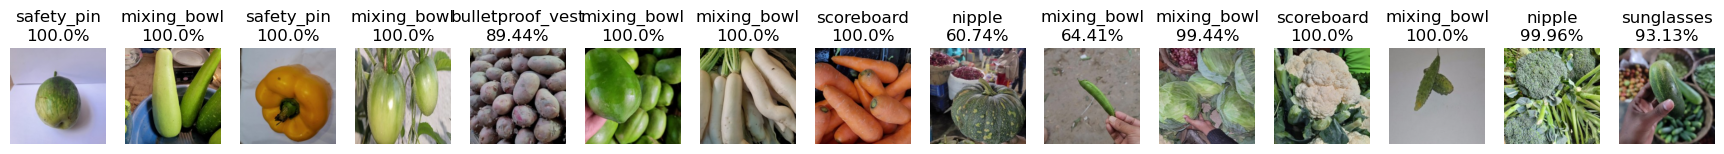

In [19]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('xception')
predict_and_display(files_batch, titles, 'xception')

mobilenet
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n04209239', 'shower_curtain', 0.7182288), ('n03637318', 'lampshade', 0.028478216), ('n03938244', 'pillow', 0.026524395), ('n04590129', 'window_shade', 0.017874548), ('n03958227', 'plastic_bag', 0.0130725475)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[('n03938244', 'pillow', 0.096320115), ('n03637318', 'lampshade', 0.040519226), ('n03291819', 'envelope', 0.032785524), ('n04209239', 'shower_curtain', 0.031438928), ('n04507155', 'umbrella', 0.024976829)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[('n04209239', 'shower_curtain', 0.93970895), ('n03938244', 'pillow', 0.0250836), ('n03347037', 'fire_screen', 0.0022025078), ('n03676483', 'lipstick', 0.0016632633), ('n03485794', 'handkerchief', 0.0014475281)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[('n04209239', 'shower_curtain', 0.8887782), ('n03938244', 'pillow', 0.06342873), ('n03485794', 'handkerchief', 0.002674836), ('n02730930', 'apron', 0.0019583022), ('n04591157', 'Windsor_tie', 0.00185159

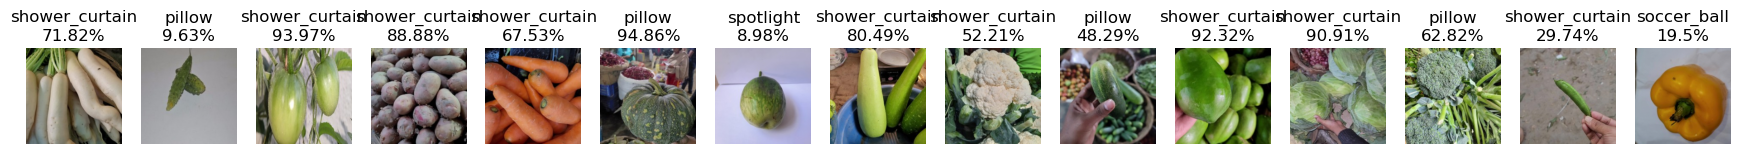

In [20]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('mobilenet')
predict_and_display(files_batch, titles, 'mobilenet')

# **VGG16**

## **1Cycle**

In [ ]:
# 제일 유사도가 높다고 생각되는 모델 먼저 사용

In [9]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 이미지와 배치사이즈 선언
IMAGE_SIZE = 64
BATCH_SIZE = 64

# Dataset class를 만들어서 Sequence를 상속받아서 만들어서 사용한다
class Dataset(Sequence):
    
    # 생성자
    # 훈련할 경로로, 타겟, 배치사이즈, aug, preprocess를 전달하는데 augmentation은 객체를 전달해야한다.
    # Dataset을 객체화 할 때 aug에 객체를 전달하면 cv2로 가져온 이미지를 넣어주면서 적용되는 원리이다.
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        # 전처리 함수 (preprocess)
        self.preprocess = preprocess
        self.shuffle = shuffle

        # 1 에포크당 데이터셋 객체가 자동으로 객체화 되며, 1 에포크당 1번의 새로운 데이터가 만들어진다.
        # 에포크 종료시, 객체 생성 및 데이터 섞기 (매 에포크당 새로운 객체를 쓸 수 있게 만들어준다)
        if self.shuffle:
            self.on_epoch_end()
            
    # len 재정의 함수 (하나의 배치사이즈에 필요한 개수를 리턴해주기 위해, 데이터의 길이를 리턴) 
    def __len__(self):
        # (반올림(전체 개수 / 전달받은 배치사이즈 개수)) 전체가 float 이기때문에 int로 형변환 
        return int(np.ceil(len(self.targets) / self.batch_size))

    # len 의 개수에 맞춰 getitem으로 해당하는 데이터를 가져오며 그걸 fit 하는 원리이다.
    # 해당 인덱스에 해당하는 batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        
        # index 번호에 맞는 데이터들을 가져온다.
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # file_path_batch 행의 개수(데이터 수)만큼 4차원으로 nd array를 만들어야한다. (배치사이즈, 길이, 높이, 깊이)
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 이미지 전처리(aug)는 1장씩 하기때머문에, 반복문을 통해 하나씩 실행하고 그걸 전부 리스트에 담아서 리턴한다.
        for i in range(file_paths_batch.shape[0]):
            
            # 파일 경로에서 이미지를 읽어온 후 BGR에서 RGB로 변환
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 원본 이미지를 선언해놓은 이미지 사이즈로 재조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # augmentation이 있다면 그걸 이미지에 적용
            if self.aug is not None:
                image = self.aug(image=image)['image']

            # preprocess가 전달됐다면 이미지 전처리 적용
            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            # 변환이 다 끝난 이미지 저장
            results_batch[i] = image

        # 처리된 이미지 결과와 타겟을 리턴
        return results_batch, targets_batch

    # 1 epoch가 끝날 때마다 shuffle로 데이터를 섞어주는 함수
    def on_epoch_end(self):
        
        # shuffle 메소드를 사용하여 한 쌍씩(이미지, 타겟) 섞기
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [22]:
import albumentations as A
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy


# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(15, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [24]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='vgg16', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          25,6

 Total params: 14,741,103 (56.23 MB)

 Trainable params: 14,741,103 (56.23 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback 함수 선언
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [26]:
import gc

# 메모리 해제 함수
gc.collect()

159635

In [27]:
N_EPOCHS = 10

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 366s 2s/step - acc: 0.0803 - loss: 4.3428 - val_acc: 0.1483 - val_loss: 2.3332 - learning_rate: 0.0010
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - acc: 0.2335 - loss: 2.1357 - val_acc: 0.3850 - val_loss: 1.6516 - learning_rate: 0.0010
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - acc: 0.4616 - loss: 1.4838 - val_acc: 0.6123 - val_loss: 1.0783 - learning_rate: 0.0010
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - acc: 0.6618 - loss: 0.9782 - val_acc: 0.7453 - val_loss: 0.7472 - learning_rate: 0.0010
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - acc: 0.7694 - loss: 0.6978 - val_acc: 0.8057 - val_loss: 0.5906 - learning_rate: 0.0010
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - acc: 0.8305 - loss: 0.5125 - val_acc: 0.8507 - val_loss: 0.4714 - learning_rate: 0.0010
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - acc: 0.8681 - loss: 0.4095 - val_acc: 0.8727 - val_loss: 0.4063 - learning_rate: 0.0010
Epoch 8/10

In [28]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 368ms/step - acc: 0.8990 - loss: 0.3278


[0.34669482707977295, 0.8986666798591614]

#### train acc: 0.9363 , val acc: 0.8900, test acc: 0.8986

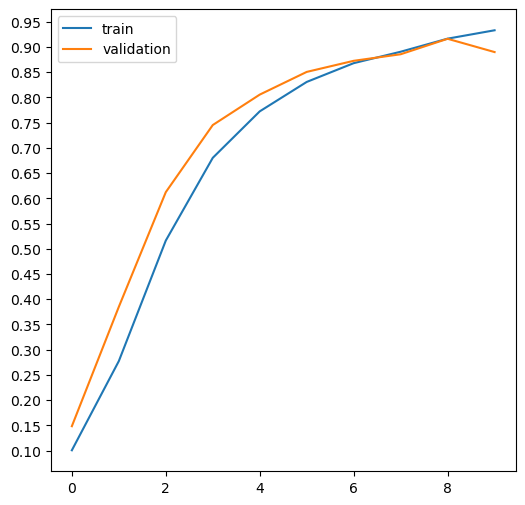

In [29]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


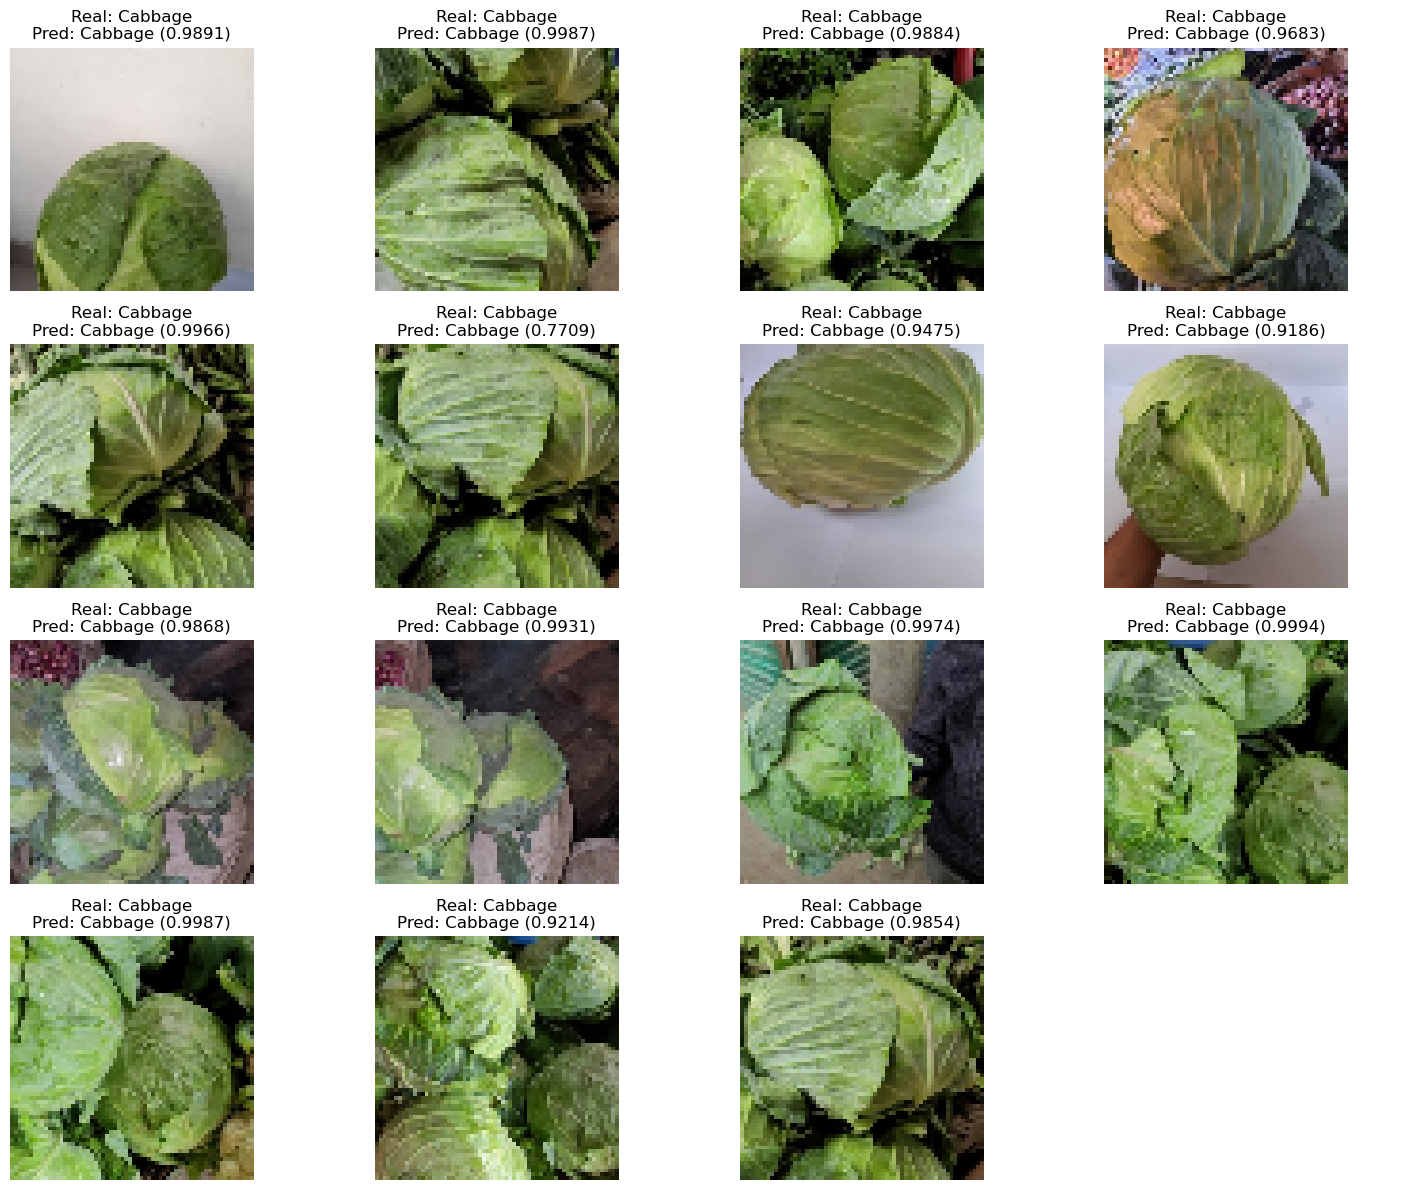

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

# 클래스 이름 지정
class_names = ['Bean',
'Bitter_Gourd',
'Bottle_Gourd',
'Brinjal',
'Broccoli',
'Cabbage',
'Capsicum',
'Carrot',
'Cauliflower',
'Cucumber',
'Papaya',
'Potato',
'Pumpkin',
'Radish',
'Tomato']

# 선택할 이미지의 시작 인덱스와 끝 인덱스 지정
start_index = 5000
end_index = 5015

# 행과 열의 개수 지정
num_rows = (end_index - start_index + 3) // 4  # +3 ensures rounding up
num_cols = 4

# 서브플롯 설정
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# 시작부터 끝 인덱스까지의 이미지들을 처리
for idx, i in enumerate(range(start_index, end_index)):
    # 이미지 파일 경로 선택
    selected_file_path = train_file_paths[i]

    # 이미지 로드 및 전처리
    image = cv2.cvtColor(cv2.imread(selected_file_path), cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (64, 64))
    processed_image = vgg16_preprocess_input(image.copy())

    # 모델 예측
    predicted_probabilities = model.predict(np.expand_dims(processed_image, axis=0))

    # 예측된 클래스 및 확률 출력
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class_name = class_names[predicted_class_index]
    predicted_probability = predicted_probabilities[0][predicted_class_index]

    # 실제 클래스 정보 가져오기
    real_class_index = np.where(train_targets[i])[0][0]  # True 값의 인덱스 가져오기
    real_class_name = class_names[real_class_index]

    # 서브플롯에 이미지와 텍스트 출력
    ax = axs[idx // num_cols, idx % num_cols]
    ax.imshow(image)
    ax.set_title(f"Real: {real_class_name}\nPred: {predicted_class_name} ({predicted_probability:.4f})")
    ax.axis('off')

# 남은 서브플롯을 비활성화
for j in range(idx + 1, num_rows * num_cols):
    axs[j // num_cols, j % num_cols].axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


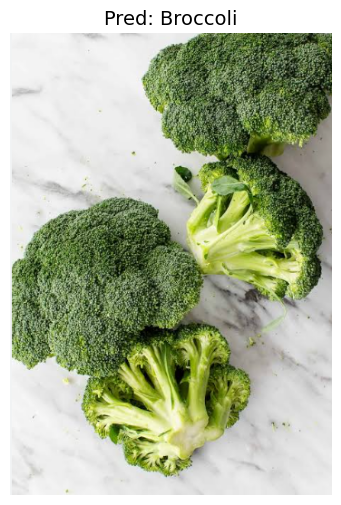

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 클래스 이름 정의
CLASS_NAMES = ['Bean',
'Bitter_Gourd',
'Bottle_Gourd',
'Brinjal',
'Broccoli',
'Cabbage',
'Capsicum',
'Carrot',
'Cauliflower',
'Cucumber',
'Papaya',
'Potato',
'Pumpkin',
'Radish',
'Tomato']

# 이미지 크기 설정
IMAGE_SIZE = 64

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/vege_broccoli.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=vgg16_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=pred_class, fontsize=14)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


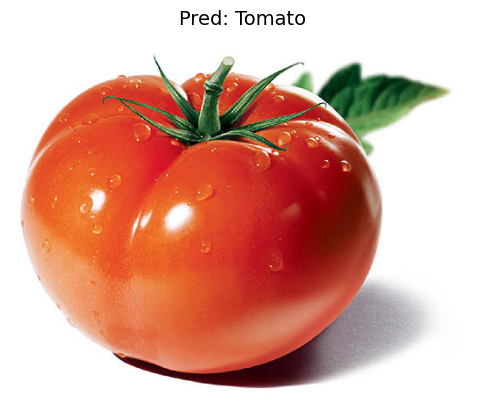

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 클래스 이름 정의
CLASS_NAMES = ['Bean',
'Bitter_Gourd',
'Bottle_Gourd',
'Brinjal',
'Broccoli',
'Cabbage',
'Capsicum',
'Carrot',
'Cauliflower',
'Cucumber',
'Papaya',
'Potato',
'Pumpkin',
'Radish',
'Tomato']

# 이미지 크기 설정
IMAGE_SIZE = 64

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/vege_tomato.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=vgg16_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=pred_class, fontsize=14)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


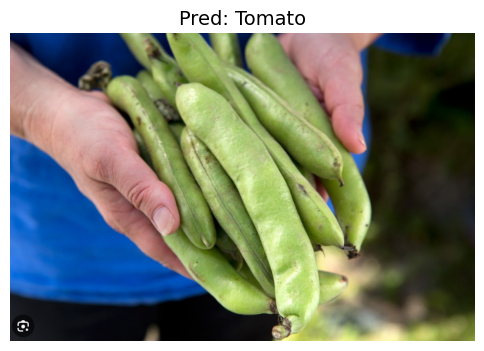

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 클래스 이름 정의
CLASS_NAMES = ['Bean',
'Bitter_Gourd',
'Bottle_Gourd',
'Brinjal',
'Broccoli',
'Cabbage',
'Capsicum',
'Carrot',
'Cauliflower',
'Cucumber',
'Papaya',
'Potato',
'Pumpkin',
'Radish',
'Tomato']

# 이미지 크기 설정
IMAGE_SIZE = 64

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/vege_bean.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=vgg16_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=pred_class, fontsize=14)

## **2Cycle**

In [ ]:
# 정확도를 조금만 더 올려보자. 오답이 있음.
# 데이터의 양이 충분하므로 dense 를 먼저 늘려본다.

In [11]:
import albumentations as A
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy


# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(100, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(15, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [13]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='vgg16', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          51,3

 Total params: 14,767,503 (56.33 MB)

 Trainable params: 14,767,503 (56.33 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
import gc

# 메모리 해제 함수
gc.collect()

300

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback 함수 선언
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=4,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [16]:
N_EPOCHS = 10

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - acc: 0.0710 - loss: 5.2788 - val_acc: 0.2543 - val_loss: 2.0785 - learning_rate: 0.0010
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - acc: 0.3093 - loss: 1.9044 - val_acc: 0.5493 - val_loss: 1.2427 - learning_rate: 0.0010
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 339s 1s/step - acc: 0.5961 - loss: 1.1251 - val_acc: 0.6143 - val_loss: 1.1453 - learning_rate: 0.0010
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - acc: 0.7549 - loss: 0.7255 - val_acc: 0.7517 - val_loss: 0.7422 - learning_rate: 0.0010
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 342s 1s/step - acc: 0.8301 - loss: 0.5131 - val_acc: 0.7570 - val_loss: 0.7352 - learning_rate: 0.0010
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - acc: 0.8662 - loss: 0.3997 - val_acc: 0.8757 - val_loss: 0.3865 - learning_rate: 0.0010
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - acc: 0.9161 - loss: 0.2642 - val_acc: 0.9060 - val_loss: 0.3076 - learning_rate: 0.0010
Epoch 8/10

In [53]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=vgg16_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 686ms/step - acc: 0.9556 - loss: 0.1534


[0.18062682449817657, 0.9470000267028809]

#### train acc: 0.9492 , val acc: 0.9370, test acc: 0.9470

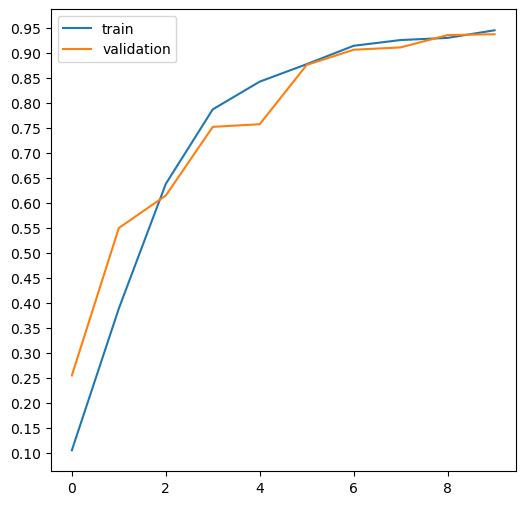

In [17]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


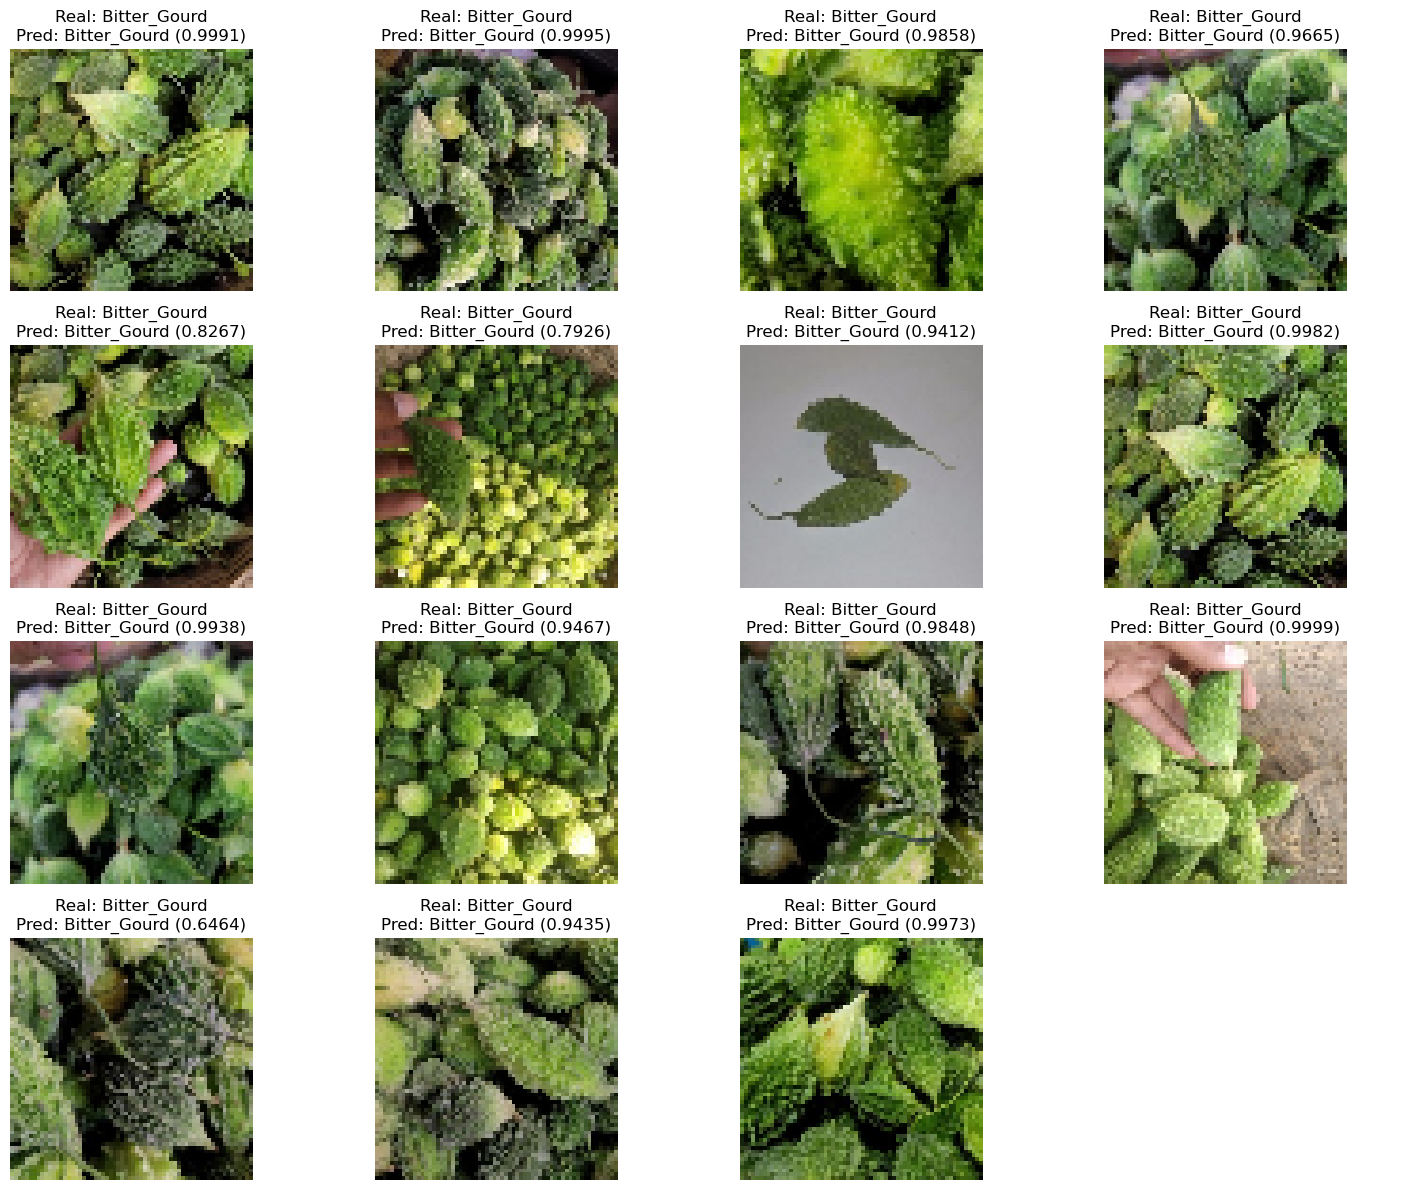

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

# 클래스 이름 지정
class_names = ['Bean',
'Bitter_Gourd',
'Bottle_Gourd',
'Brinjal',
'Broccoli',
'Cabbage',
'Capsicum',
'Carrot',
'Cauliflower',
'Cucumber',
'Papaya',
'Potato',
'Pumpkin',
'Radish',
'Tomato']

# 선택할 이미지의 시작 인덱스와 끝 인덱스 지정
start_index = 1000
end_index = 1015

# 행과 열의 개수 지정
num_rows = (end_index - start_index + 3) // 4  # +3 ensures rounding up
num_cols = 4

# 서브플롯 설정
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# 시작부터 끝 인덱스까지의 이미지들을 처리
for idx, i in enumerate(range(start_index, end_index)):
    # 이미지 파일 경로 선택
    selected_file_path = train_file_paths[i]

    # 이미지 로드 및 전처리
    image = cv2.cvtColor(cv2.imread(selected_file_path), cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (64, 64))
    processed_image = vgg16_preprocess_input(image.copy())

    # 모델 예측
    predicted_probabilities = model.predict(np.expand_dims(processed_image, axis=0))

    # 예측된 클래스 및 확률 출력
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class_name = class_names[predicted_class_index]
    predicted_probability = predicted_probabilities[0][predicted_class_index]

    # 실제 클래스 정보 가져오기
    real_class_index = np.where(train_targets[i])[0][0]  # True 값의 인덱스 가져오기
    real_class_name = class_names[real_class_index]

    # 서브플롯에 이미지와 텍스트 출력
    ax = axs[idx // num_cols, idx % num_cols]
    ax.imshow(image)
    ax.set_title(f"Real: {real_class_name}\nPred: {predicted_class_name} ({predicted_probability:.4f})")
    ax.axis('off')

# 남은 서브플롯을 비활성화
for j in range(idx + 1, num_rows * num_cols):
    axs[j // num_cols, j % num_cols].axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


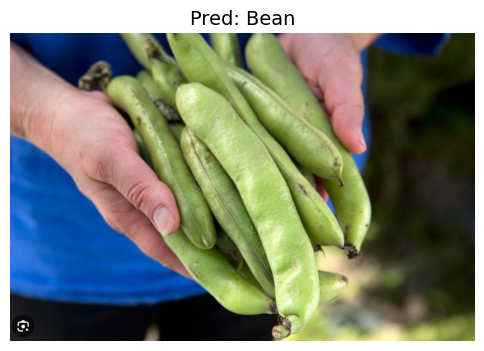

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 클래스 이름 정의
CLASS_NAMES = ['Bean',
'Bitter_Gourd',
'Bottle_Gourd',
'Brinjal',
'Broccoli',
'Cabbage',
'Capsicum',
'Carrot',
'Cauliflower',
'Cucumber',
'Papaya',
'Potato',
'Pumpkin',
'Radish',
'Tomato']

# 이미지 크기 설정
IMAGE_SIZE = 64

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/vege_bean.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=vgg16_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=pred_class, fontsize=14)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


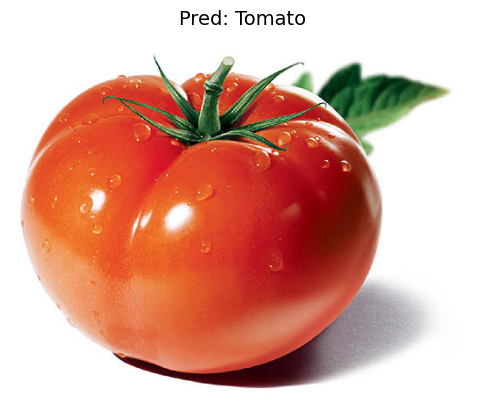

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 클래스 이름 정의
CLASS_NAMES = ['Bean',
'Bitter_Gourd',
'Bottle_Gourd',
'Brinjal',
'Broccoli',
'Cabbage',
'Capsicum',
'Carrot',
'Cauliflower',
'Cucumber',
'Papaya',
'Potato',
'Pumpkin',
'Radish',
'Tomato']

# 이미지 크기 설정
IMAGE_SIZE = 64

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/vege_tomato.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=vgg16_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=pred_class, fontsize=14)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


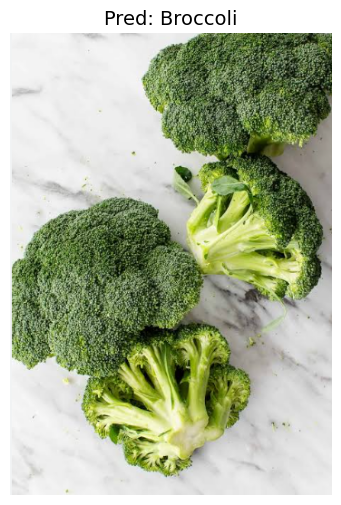

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 클래스 이름 정의
CLASS_NAMES = ['Bean',
'Bitter_Gourd',
'Bottle_Gourd',
'Brinjal',
'Broccoli',
'Cabbage',
'Capsicum',
'Carrot',
'Cauliflower',
'Cucumber',
'Papaya',
'Potato',
'Pumpkin',
'Radish',
'Tomato']

# 이미지 크기 설정
IMAGE_SIZE = 64

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(file_path, preprocess=None):
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        if preprocess:
            image = preprocess(image)
    else:
        print(f"Error loading image: {file_path}")
    return image

# 이미지 시각화 함수 정의
def show_single_image(image, target, prediction, fontsize=16):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f'Pred: {CLASS_NAMES[prediction]}', fontsize=fontsize)
    plt.axis('off')
    plt.show()

# 실제 이미지 경로
root_real_image_project02 = './datasets/vege_broccoli.png'
real_image_project02 = load_and_preprocess_image(root_real_image_project02, preprocess=vgg16_preprocess_input)
origin_image_project02 = cv2.cvtColor(cv2.imread(root_real_image_project02), cv2.COLOR_BGR2RGB)

# 모델 예측 수행
real_image_project02_expanded = np.expand_dims(real_image_project02, axis=0)  # 배치 차원을 추가
pred_probas = model.predict(real_image_project02_expanded)
pred_class = np.argmax(pred_probas, axis=1)[0]

# 실제 이미지 시각화
show_single_image(origin_image_project02, target=1, prediction=pred_class, fontsize=14)

In [18]:
import matplotlib.pyplot as plt
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')

# **mobilenet**

## **1Cycle**

In [58]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 이미지와 배치사이즈 선언
IMAGE_SIZE = 64
BATCH_SIZE = 64

# Dataset class를 만들어서 Sequence를 상속받아서 만들어서 사용한다
class Dataset(Sequence):
    
    # 생성자
    # 훈련할 경로로, 타겟, 배치사이즈, aug, preprocess를 전달하는데 augmentation은 객체를 전달해야한다.
    # Dataset을 객체화 할 때 aug에 객체를 전달하면 cv2로 가져온 이미지를 넣어주면서 적용되는 원리이다.
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        # 전처리 함수 (preprocess)
        self.preprocess = preprocess
        self.shuffle = shuffle

        # 1 에포크당 데이터셋 객체가 자동으로 객체화 되며, 1 에포크당 1번의 새로운 데이터가 만들어진다.
        # 에포크 종료시, 객체 생성 및 데이터 섞기 (매 에포크당 새로운 객체를 쓸 수 있게 만들어준다)
        if self.shuffle:
            self.on_epoch_end()
            
    # len 재정의 함수 (하나의 배치사이즈에 필요한 개수를 리턴해주기 위해, 데이터의 길이를 리턴) 
    def __len__(self):
        # (반올림(전체 개수 / 전달받은 배치사이즈 개수)) 전체가 float 이기때문에 int로 형변환 
        return int(np.ceil(len(self.targets) / self.batch_size))

    # len 의 개수에 맞춰 getitem으로 해당하는 데이터를 가져오며 그걸 fit 하는 원리이다.
    # 해당 인덱스에 해당하는 batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        
        # index 번호에 맞는 데이터들을 가져온다.
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # file_path_batch 행의 개수(데이터 수)만큼 4차원으로 nd array를 만들어야한다. (배치사이즈, 길이, 높이, 깊이)
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 이미지 전처리(aug)는 1장씩 하기때머문에, 반복문을 통해 하나씩 실행하고 그걸 전부 리스트에 담아서 리턴한다.
        for i in range(file_paths_batch.shape[0]):
            
            # 파일 경로에서 이미지를 읽어온 후 BGR에서 RGB로 변환
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 원본 이미지를 선언해놓은 이미지 사이즈로 재조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # augmentation이 있다면 그걸 이미지에 적용
            if self.aug is not None:
                image = self.aug(image=image)['image']

            # preprocess가 전달됐다면 이미지 전처리 적용
            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            # 변환이 다 끝난 이미지 저장
            results_batch[i] = image

        # 처리된 이미지 결과와 타겟을 리턴
        return results_batch, targets_batch

    # 1 epoch가 끝날 때마다 shuffle로 데이터를 섞어주는 함수
    def on_epoch_end(self):
        
        # shuffle 메소드를 사용하여 한 쌍씩(이미지, 타겟) 섞기
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [59]:
import albumentations as A
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy


# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

In [60]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(15, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [61]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='mobilenet', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_1216\926459596.py:19: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 32, 32, 32)        │             864 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 32, 32, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 32, 32, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 32, 32, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 32, 32, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 32, 32, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 32, 32, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 32, 32, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 32, 32, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 32, 32, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 32, 32, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 33, 33, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 16, 16, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,799 (8.86 MB)

 Trainable params: 2,288,687 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [62]:
import gc

# 메모리 해제 함수
gc.collect()

10393

In [63]:
N_EPOCHS = 10

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 117s 397ms/step - acc: 0.4917 - loss: 1.7495 - val_acc: 0.6010 - val_loss: 2.4821 - learning_rate: 0.0010
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 92s 390ms/step - acc: 0.9146 - loss: 0.3729 - val_acc: 0.5963 - val_loss: 2.9847 - learning_rate: 0.0010
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 92s 390ms/step - acc: 0.9460 - loss: 0.2324 - val_acc: 0.5020 - val_loss: 6.0569 - learning_rate: 0.0010
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 93s 393ms/step - acc: 0.9604 - loss: 0.1881 - val_acc: 0.4160 - val_loss: 4.8126 - learning_rate: 0.0010


In [64]:
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

model.evaluate(test_dataset, batch_size=BATCH_SIZE)

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - acc: 0.3751 - loss: 5.5483


[4.723398208618164, 0.4233333468437195]

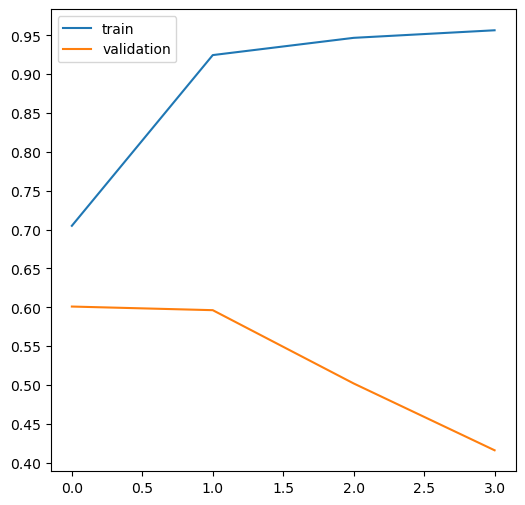

In [65]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

## **2Cycle**

In [66]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 이미지와 배치사이즈 선언
IMAGE_SIZE = 150
BATCH_SIZE = 64

# Dataset class를 만들어서 Sequence를 상속받아서 만들어서 사용한다
class Dataset(Sequence):
    
    # 생성자
    # 훈련할 경로로, 타겟, 배치사이즈, aug, preprocess를 전달하는데 augmentation은 객체를 전달해야한다.
    # Dataset을 객체화 할 때 aug에 객체를 전달하면 cv2로 가져온 이미지를 넣어주면서 적용되는 원리이다.
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        # 전처리 함수 (preprocess)
        self.preprocess = preprocess
        self.shuffle = shuffle

        # 1 에포크당 데이터셋 객체가 자동으로 객체화 되며, 1 에포크당 1번의 새로운 데이터가 만들어진다.
        # 에포크 종료시, 객체 생성 및 데이터 섞기 (매 에포크당 새로운 객체를 쓸 수 있게 만들어준다)
        if self.shuffle:
            self.on_epoch_end()
            
    # len 재정의 함수 (하나의 배치사이즈에 필요한 개수를 리턴해주기 위해, 데이터의 길이를 리턴) 
    def __len__(self):
        # (반올림(전체 개수 / 전달받은 배치사이즈 개수)) 전체가 float 이기때문에 int로 형변환 
        return int(np.ceil(len(self.targets) / self.batch_size))

    # len 의 개수에 맞춰 getitem으로 해당하는 데이터를 가져오며 그걸 fit 하는 원리이다.
    # 해당 인덱스에 해당하는 batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        
        # index 번호에 맞는 데이터들을 가져온다.
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # file_path_batch 행의 개수(데이터 수)만큼 4차원으로 nd array를 만들어야한다. (배치사이즈, 길이, 높이, 깊이)
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 이미지 전처리(aug)는 1장씩 하기때머문에, 반복문을 통해 하나씩 실행하고 그걸 전부 리스트에 담아서 리턴한다.
        for i in range(file_paths_batch.shape[0]):
            
            # 파일 경로에서 이미지를 읽어온 후 BGR에서 RGB로 변환
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 원본 이미지를 선언해놓은 이미지 사이즈로 재조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # augmentation이 있다면 그걸 이미지에 적용
            if self.aug is not None:
                image = self.aug(image=image)['image']

            # preprocess가 전달됐다면 이미지 전처리 적용
            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            # 변환이 다 끝난 이미지 저장
            results_batch[i] = image

        # 처리된 이미지 결과와 타겟을 리턴
        return results_batch, targets_batch

    # 1 epoch가 끝날 때마다 shuffle로 데이터를 섞어주는 함수
    def on_epoch_end(self):
        
        # shuffle 메소드를 사용하여 한 쌍씩(이미지, 타겟) 섞기
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [67]:
import albumentations as A
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy


# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

In [68]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='mobilenet', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_1216\926459596.py:19: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)    │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 75, 75, 32)        │             864 │ input_layer_9[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 75, 75, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 75, 75, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 75, 75, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 75, 75, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 75, 75, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 75, 75, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 75, 75, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 75, 75, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 75, 75, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 75, 75, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 77, 77, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 38, 38, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,799 (8.86 MB)

 Trainable params: 2,288,687 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [69]:
import gc

# 메모리 해제 함수
gc.collect()

12420

In [70]:
N_EPOCHS = 10

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 480s 2s/step - acc: 0.7388 - loss: 0.9170 - val_acc: 0.2520 - val_loss: 13.9980 - learning_rate: 0.0010
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 455s 2s/step - acc: 0.9482 - loss: 0.2126 - val_acc: 0.4350 - val_loss: 8.1273 - learning_rate: 0.0010
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 455s 2s/step - acc: 0.9681 - loss: 0.1469 - val_acc: 0.2723 - val_loss: 13.7673 - learning_rate: 0.0010
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 455s 2s/step - acc: 0.9781 - loss: 0.0989 - val_acc: 0.6193 - val_loss: 5.5043 - learning_rate: 0.0010


## **3Cycle**

In [79]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 이미지와 배치사이즈 선언
IMAGE_SIZE = 150
BATCH_SIZE = 64

# Dataset class를 만들어서 Sequence를 상속받아서 만들어서 사용한다
class Dataset(Sequence):
    
    # 생성자
    # 훈련할 경로로, 타겟, 배치사이즈, aug, preprocess를 전달하는데 augmentation은 객체를 전달해야한다.
    # Dataset을 객체화 할 때 aug에 객체를 전달하면 cv2로 가져온 이미지를 넣어주면서 적용되는 원리이다.
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        # 전처리 함수 (preprocess)
        self.preprocess = preprocess
        self.shuffle = shuffle

        # 1 에포크당 데이터셋 객체가 자동으로 객체화 되며, 1 에포크당 1번의 새로운 데이터가 만들어진다.
        # 에포크 종료시, 객체 생성 및 데이터 섞기 (매 에포크당 새로운 객체를 쓸 수 있게 만들어준다)
        if self.shuffle:
            self.on_epoch_end()
            
    # len 재정의 함수 (하나의 배치사이즈에 필요한 개수를 리턴해주기 위해, 데이터의 길이를 리턴) 
    def __len__(self):
        # (반올림(전체 개수 / 전달받은 배치사이즈 개수)) 전체가 float 이기때문에 int로 형변환 
        return int(np.ceil(len(self.targets) / self.batch_size))

    # len 의 개수에 맞춰 getitem으로 해당하는 데이터를 가져오며 그걸 fit 하는 원리이다.
    # 해당 인덱스에 해당하는 batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        
        # index 번호에 맞는 데이터들을 가져온다.
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # file_path_batch 행의 개수(데이터 수)만큼 4차원으로 nd array를 만들어야한다. (배치사이즈, 길이, 높이, 깊이)
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 이미지 전처리(aug)는 1장씩 하기때머문에, 반복문을 통해 하나씩 실행하고 그걸 전부 리스트에 담아서 리턴한다.
        for i in range(file_paths_batch.shape[0]):
            
            # 파일 경로에서 이미지를 읽어온 후 BGR에서 RGB로 변환
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 원본 이미지를 선언해놓은 이미지 사이즈로 재조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # augmentation이 있다면 그걸 이미지에 적용
            if self.aug is not None:
                image = self.aug(image=image)['image']

            # preprocess가 전달됐다면 이미지 전처리 적용
            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            # 변환이 다 끝난 이미지 저장
            results_batch[i] = image

        # 처리된 이미지 결과와 타겟을 리턴
        return results_batch, targets_batch

    # 1 epoch가 끝날 때마다 shuffle로 데이터를 섞어주는 함수
    def on_epoch_end(self):
        
        # shuffle 메소드를 사용하여 한 쌍씩(이미지, 타겟) 섞기
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [80]:
import albumentations as A
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 데이터 증강(augmentation) 정의
aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    # 이미지를 랜덤으로 이동, 스케일링, 회전 (확률 50%)
    A.HorizontalFlip(p=0.5),
    # 이미지를 랜덤으로 수평 반전 (확률 50%)
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    # 이미지를 랜덤으로 밝기와 대비를 조정 (밝기 및 대비 조정 범위: ±20%, 확률 50%)
])

# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE,
                        aug=aug,
                        preprocess=mobilenet_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=mobilenet_preprocess_input)

In [81]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='mobilenet', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_1216\926459596.py:19: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)   │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 75, 75, 32)        │             864 │ input_layer_12[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 75, 75, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 75, 75, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 75, 75, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 75, 75, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 75, 75, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 75, 75, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 75, 75, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 75, 75, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 75, 75, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 75, 75, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 77, 77, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 38, 38, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,799 (8.86 MB)

 Trainable params: 2,288,687 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [82]:
import gc

# 메모리 해제 함수
gc.collect()

20597

In [83]:
N_EPOCHS = 10

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 494s 2s/step - acc: 0.7119 - loss: 1.0268 - val_acc: 0.3103 - val_loss: 14.9987 - learning_rate: 0.0010
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 468s 2s/step - acc: 0.9251 - loss: 0.3333 - val_acc: 0.2613 - val_loss: 12.1380 - learning_rate: 0.0010
Epoch 3/10
 13/235 ━━━━━━━━━━━━━━━━━━━━ 7:02 2s/step - acc: 0.9658 - loss: 0.1644

KeyboardInterrupt: 